In [1]:
%load_ext autoreload
%autoreload 2

import os
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from statsmodels.formula.api import ols
DIRECTORY = "/Users/rumeysaerturk/Desktop/BLG348_Reproducibility_Project_v2/VCF_Comparison/"

In [2]:
df = pd.read_excel(os.path.join(DIRECTORY, "scores_copy.xlsx"), header=0)
df

,Unnamed: 0,pipeline,Caller,BaseCalib,Mapper,group,precision,recall,f1,accuracy,...,Time_spent_on_downloading_data,Time_debugging_mapping,Time_for_mapping,Time_for_variant_calling,Time_for_filtering,Time_for_analysis,Time_for_visualization,Time_for_report,Time_for_presentation,Most_difficult_part
0,1,mutect_yb_bwa,mutect,yb,bwa,g1,0.862167,0.781223,0.819702,0.694487,...,8-16 hours,> 16 hours,> 16 hours,4-8 hours,2- 4 hours,4-8 hours,8-16 hours,8-16 hours,< 2 hours,Mapping
1,17,mutect_yb_bowtie,mutect,yb,bowtie,g1,0.877551,0.481481,0.621802,0.451170,...,8-16 hours,> 16 hours,> 16 hours,4-8 hours,2- 4 hours,4-8 hours,8-16 hours,8-16 hours,< 2 hours,Mapping
2,25,mutect_nb_bwa,mutect,nb,bwa,g1,0.777538,0.620155,0.689986,0.526701,...,8-16 hours,> 16 hours,> 16 hours,4-8 hours,2- 4 hours,4-8 hours,8-16 hours,8-16 hours,< 2 hours,Mapping
3,33,mutect_nb_bowtie,mutect,nb,bowtie,g1,0.832955,0.631352,0.718275,0.560398,...,8-16 hours,> 16 hours,> 16 hours,4-8 hours,2- 4 hours,4-8 hours,8-16 hours,8-16 hours,< 2 hours,Mapping
4,47,strelka_yb_bwa,strelka,yb,bwa,g1,0.485729,0.806202,0.606218,0.434944,...,8-16 hours,> 16 hours,> 16 hours,4-8 hours,2- 4 hours,4-8 hours,8-16 hours,8-16 hours,< 2 hours,Mapping
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
127,82,strelka_nb_bowtie,strelka,nb,bowtie,g9,0.632902,0.715762,0.671787,0.505782,...,4-8 hours,> 16 hours,> 16 hours,2- 4 hours,2- 4 hours,2- 4 hours,4-8 hours,8-16 hours,2- 4 hours,Mapping
128,88,ss_nb_bowtie,ss,nb,bowtie,g9,0.334165,0.692506,0.450799,0.290988,...,4-8 hours,> 16 hours,> 16 hours,2- 4 hours,2- 4 hours,2- 4 hours,4-8 hours,8-16 hours,2- 4 hours,Mapping
129,105,ss_nb_bwa,ss,nb,bwa,g9,0.301142,0.749354,0.429630,0.273585,...,4-8 hours,> 16 hours,> 16 hours,2- 4 hours,2- 4 hours,2- 4 hours,4-8 hours,8-16 hours,2- 4 hours,Mapping
130,115,ss_yb_bowtie,ss,yb,bowtie,g9,0.445776,0.672696,0.536217,0.366323,...,4-8 hours,> 16 hours,> 16 hours,2- 4 hours,2- 4 hours,2- 4 hours,4-8 hours,8-16 hours,2- 4 hours,Mapping


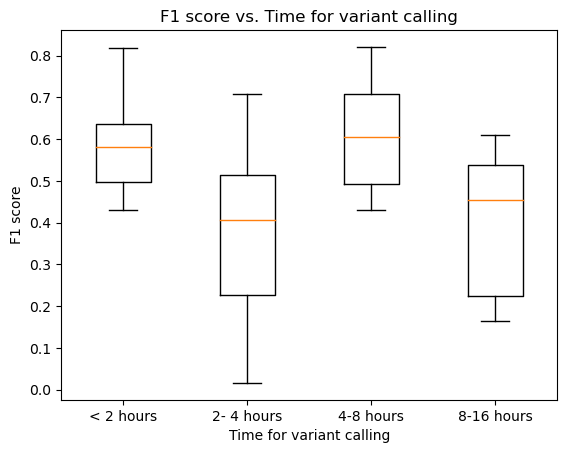

In [3]:
# Box plot Time_for_variant_calling vs. F1 score

f1_scores_vc_time = {"< 2 hours": [], "2- 4 hours": [], "4-8 hours": [], "8-16 hours": []}
for i in range(len(df)):
    time = df["Time_for_variant_calling"][i]
    f1_scores_vc_time[time].append(df["f1"][i])

plt.boxplot([f1_scores_vc_time["< 2 hours"], f1_scores_vc_time["2- 4 hours"], f1_scores_vc_time["4-8 hours"], f1_scores_vc_time["8-16 hours"]])
plt.xticks([1, 2, 3, 4], ["< 2 hours", "2- 4 hours", "4-8 hours", "8-16 hours"])
plt.ylabel("F1 score")
plt.xlabel("Time for variant calling")
plt.title("F1 score vs. Time for variant calling")
plt.show()



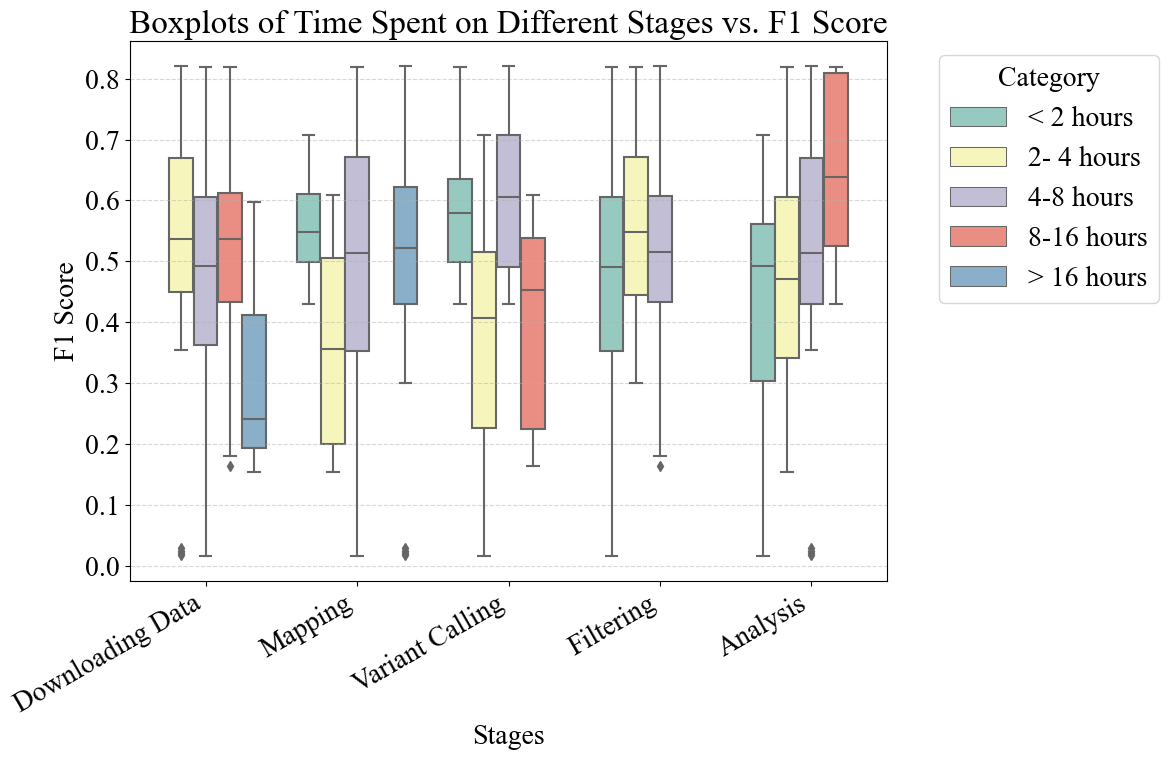

In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 20, 'font.family': 'Times New Roman'})
# Load the data
data = pd.read_excel(os.path.join(DIRECTORY, "scores_copy.xlsx"), header=0)

# Features to plot
features = [
    "Time_spent_on_downloading_data", 
    "Time_for_mapping", 
    "Time_for_variant_calling", 
    "Time_for_filtering", 
    "Time_for_analysis"
]

# Convert the data to a long format
data_long = pd.melt(data, id_vars=["f1"], value_vars=features, 
                    var_name="Feature", value_name="Category")

# Define the category order
category_order = ["< 2 hours", "2- 4 hours", "4-8 hours", "8-16 hours", "> 16 hours"]

# Convert 'Category' to categorical type with specified order
data_long["Category"] = pd.Categorical(data_long["Category"], categories=category_order, ordered=True)

# Set up the color palette for categories
category_palette = sns.color_palette("Set3", len(category_order))

# Create the boxplot
plt.figure(figsize=(12, 8))
sns.boxplot(x="Feature", y="f1", hue="Category", data=data_long, palette=category_palette)

## Customize feature column:
# Set the x-axis labels
data_long["Feature"] = data_long["Feature"].str.replace("Time_for_", "").str.replace("_", " ").str.title().str.replace("Time Spent On ", "")
plt.xticks(ticks=np.arange(len(features)), labels=data_long["Feature"].unique())

# Customize the plot
plt.title("Boxplots of Time Spent on Different Stages vs. F1 Score")
plt.xlabel("Stages")
plt.ylabel("F1 Score")
plt.legend(title="Category", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=30, ha="right", fontsize=20)
plt.grid(axis='y', linestyle='--', alpha=0.5)

# Show the plot
plt.tight_layout()
plt.savefig(os.path.join(DIRECTORY, "Figures", "boxplot_times_f1.pdf"))
plt.show()


------

Average Cross-Validation R² Score: 0.6651003080594524
Mean Squared Error: 0.00804877900798972
R² Score: 0.8472972544673891


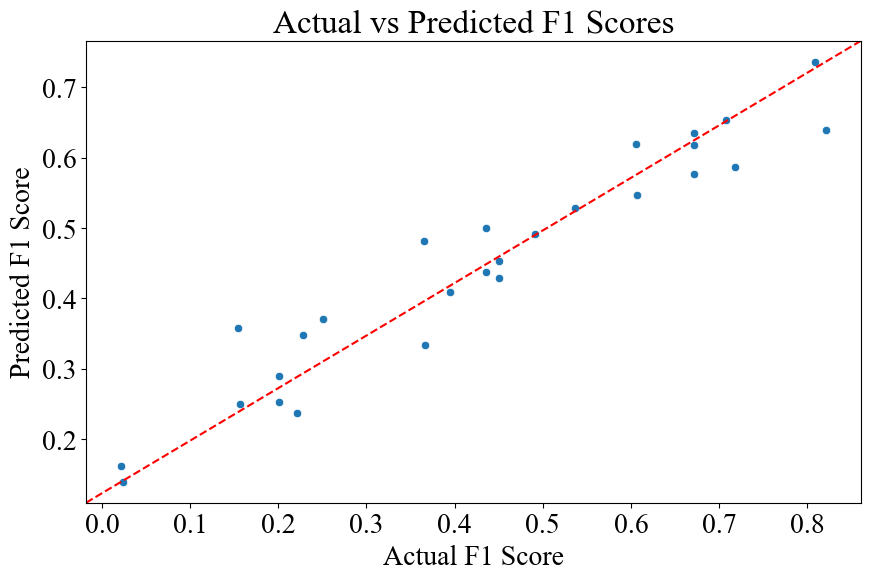

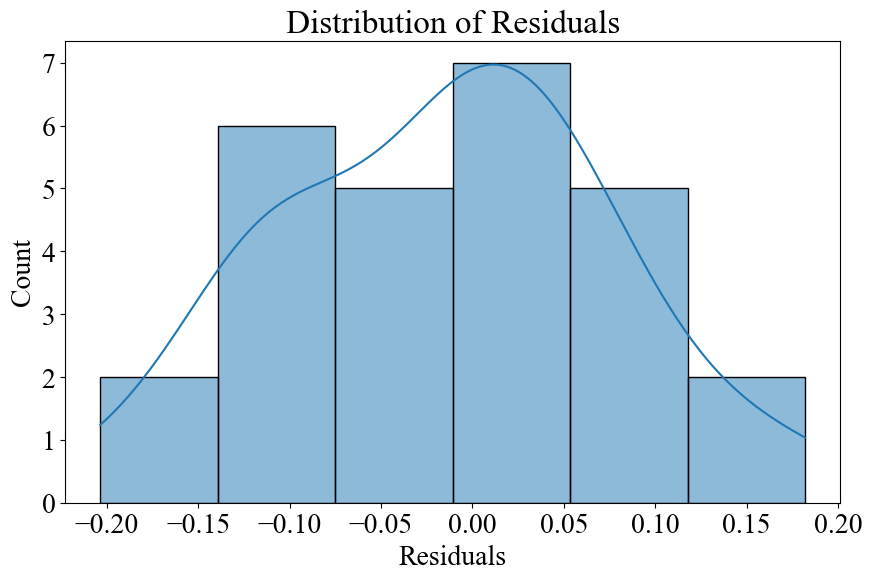

In [70]:
import pandas as pd
import os
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

# Load the data
file_path = os.path.join(DIRECTORY, "scores_copy.xlsx")  # Update the path as necessary
data = pd.read_excel(file_path)

# Define the features to use for prediction and target variable
features = [
    "Caller", 
    "BaseCalib", 
    "Mapper",
    "Time_spent_on_downloading_data", 
    "Time_for_mapping", 
    "Time_for_variant_calling", 
    "Time_for_filtering", 
    "Time_for_analysis",
    "Time_debugging_mapping", 
]
target = "f1"

# Convert categorical features to numerical using one-hot encoding
data_encoded = pd.get_dummies(data[features], drop_first=True)

# Extract the target variable
y = data[target]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data_encoded, y, test_size=0.2, random_state=34)

# Initialize the Random Forest Regressor
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=34)

# Perform 10-fold cross-validation to get R² scores
cv_r2_scores = cross_val_score(rf_regressor, X_train, y_train, cv=5, scoring='r2')

# Calculate and print the average R² score from cross-validation
mean_cv_r2_score = cv_r2_scores.mean()
print(f"Average Cross-Validation R² Score: {mean_cv_r2_score}")

# Train the model on the full training set
rf_regressor.fit(X_train, y_train)

# Predict using the test data
y_pred = rf_regressor.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R² Score: {r2}")

# Pickle the model
model_filename = 'rf_regressor_model.pkl'  # Update the path as necessary
with open(model_filename, 'wb') as file:
    pickle.dump(rf_regressor, file)

# Visualize actual vs predicted values
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred)
plt.plot([0, 1], [0, 1], '--', transform=plt.gca().transAxes, color='red')
plt.xlabel("Actual F1 Score")
plt.ylabel("Predicted F1 Score")
plt.title("Actual vs Predicted F1 Scores")
plt.show()

# Visualize residuals
residuals = y_test - y_pred
plt.figure(figsize=(10, 6))
sns.histplot(residuals, kde=True)
plt.xlabel("Residuals")
plt.title("Distribution of Residuals")
plt.show()


In [77]:
import pandas as pd
import os
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
import pickle

# Load the data
file_path = os.path.join(DIRECTORY, "scores_copy.xlsx")  # Update the path as necessary
data = pd.read_excel(file_path)

# Define the features to use for prediction and target variable
features = [
    "Caller", 
    "BaseCalib", 
    "Mapper",
    "Time_spent_on_downloading_data", 
    "Time_for_mapping", 
    "Time_for_variant_calling", 
    "Time_for_filtering", 
    "Time_for_analysis",
    "Time_debugging_mapping", 
]
target = "f1"

# Convert categorical features to numerical using one-hot encoding
data_encoded = pd.get_dummies(data[features], drop_first=True)

# Extract the target variable
y = data[target]

# Initialize the Random Forest Regressor
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)

# Set the number of random seeds for the experiment
num_seeds = 50
random_seeds = np.random.randint(0, 10000, num_seeds)  # 50 random seeds

# To store results
cv_r2_scores_list = []
test_r2_scores_list = []

# Run the model for each random seed
for seed in random_seeds:
    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(data_encoded, y, test_size=0.2, random_state=seed)

    # Perform 10-fold cross-validation to get R² scores
    cv_r2_scores = cross_val_score(rf_regressor, X_train, y_train, cv=10, scoring='r2')

    # Calculate the average and standard deviation R² score from cross-validation
    mean_cv_r2_score = cv_r2_scores.mean()
    std_cv_r2_score = cv_r2_scores.std()
    cv_r2_scores_list.append((mean_cv_r2_score, std_cv_r2_score))

    # Train the model on the full training set
    rf_regressor.fit(X_train, y_train)

    # Predict using the test data
    y_pred = rf_regressor.predict(X_test)

    # Evaluate the model on the test set
    test_r2_score = r2_score(y_test, y_pred)
    test_r2_scores_list.append(test_r2_score)

# Calculate the average and standard deviation for the cross-validation and test R² scores
cv_mean_scores = [score[0] for score in cv_r2_scores_list]
cv_std_scores = [score[1] for score in cv_r2_scores_list]

average_cv_r2_score = np.mean(cv_mean_scores)
average_test_r2_score = np.mean(test_r2_scores_list)

std_cv_r2_score = np.std(cv_mean_scores)
std_test_r2_score = np.std(test_r2_scores_list)

# Print the results
print(f"Average Cross-Validation R² Score: {average_cv_r2_score} (Std: {std_cv_r2_score})")
print(f"Average Test R² Score: {average_test_r2_score} (Std: {std_test_r2_score})")

# Prepare the data for saving in an Excel file
results_df = pd.DataFrame({
    'Random Seed': random_seeds,
    'Average CV R² Score': cv_mean_scores,
    'CV R² Std Dev': cv_std_scores,
    'Test R² Score': test_r2_scores_list,
})

# Save the results to an Excel file
output_file = 'model_performance_results_with_std.xlsx'
results_df.to_excel(output_file, index=False)

# Optionally, save the overall averages and standard deviations in a separate sheet
with pd.ExcelWriter(output_file, engine='openpyxl', mode='a') as writer:
    avg_df = pd.DataFrame({
        'Average CV R² Score': [average_cv_r2_score],
        'Std Dev CV R² Score': [std_cv_r2_score],
        'Average Test R² Score': [average_test_r2_score],
        'Std Dev Test R² Score': [std_test_r2_score]
    })
    avg_df.to_excel(writer, sheet_name='Averages', index=False)


Average Cross-Validation R² Score: 0.6400678554575755 (Std: 0.11121301999193255)
Average Test R² Score: 0.7576956534310826 (Std: 0.09759767591319)


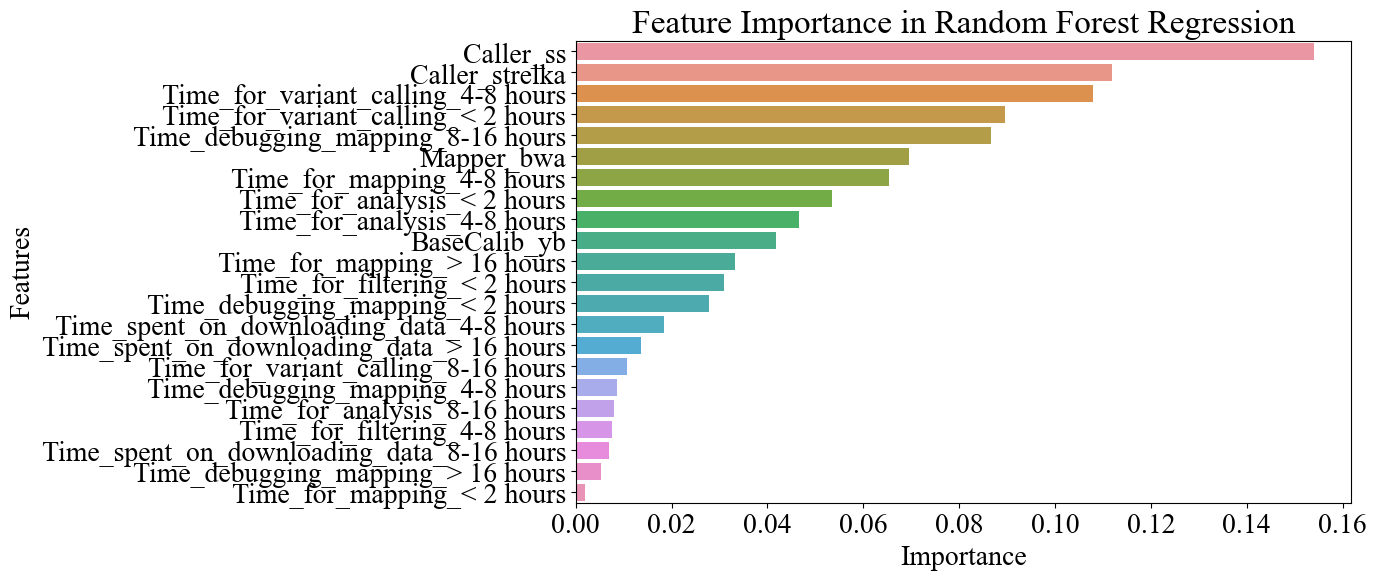

In [71]:
# Feature importance
feature_importances = pd.Series(rf_regressor.feature_importances_, index=data_encoded.columns)
feature_importances = feature_importances.sort_values(ascending=False)

# Visualize feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importances, y=feature_importances.index)
plt.title("Feature Importance in Random Forest Regression")
plt.xlabel("Importance")
plt.ylabel("Features")
plt.show()

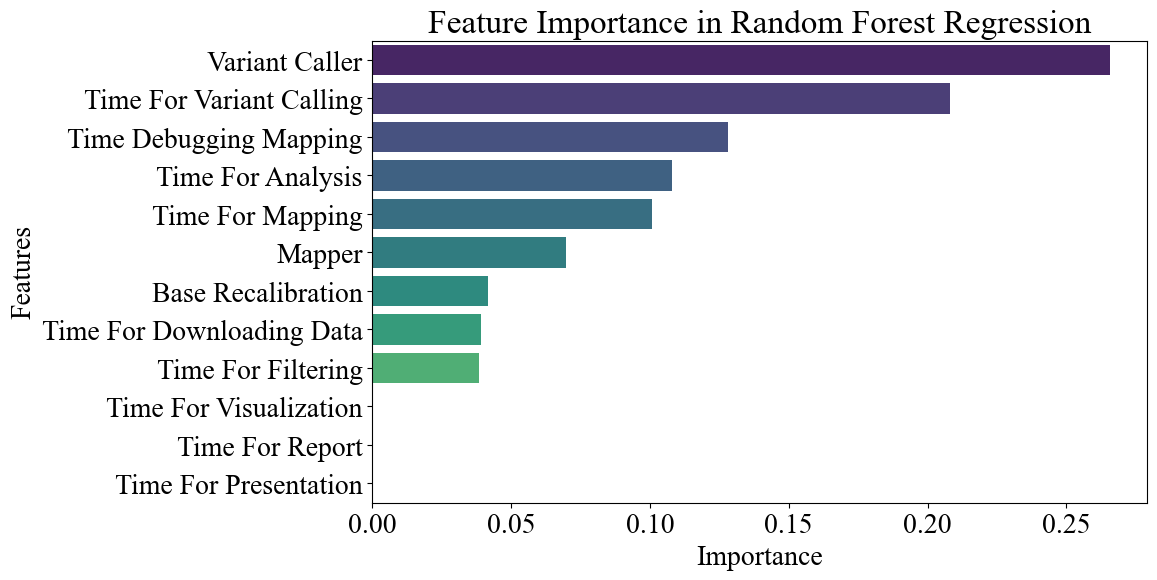

In [72]:
# Get feature importances from the trained Random Forest model
feature_importances = pd.Series(rf_regressor.feature_importances_, index=data_encoded.columns)

# Map the feature importances to their main feature names
feature_groups = {
    "Caller": [col for col in data_encoded.columns if col.startswith("Caller")],
    "BaseCalib": [col for col in data_encoded.columns if col.startswith("BaseCalib")],
    "Mapper": [col for col in data_encoded.columns if col.startswith("Mapper")],
    "Time_spent_on_downloading_data": [col for col in data_encoded.columns if col.startswith("Time_spent_on_downloading_data")],
    "Time_for_mapping": [col for col in data_encoded.columns if col.startswith("Time_for_mapping")],
    "Time_for_variant_calling": [col for col in data_encoded.columns if col.startswith("Time_for_variant_calling")],
    "Time_for_filtering": [col for col in data_encoded.columns if col.startswith("Time_for_filtering")],
    "Time_for_analysis": [col for col in data_encoded.columns if col.startswith("Time_for_analysis")],
    "Time_debugging_mapping": [col for col in data_encoded.columns if col.startswith("Time_debugging_mapping")],
    "Time_for_visualization": [col for col in data_encoded.columns if col.startswith("Time_for_visualization")],
    "Time_for_report": [col for col in data_encoded.columns if col.startswith("Time_for_report")],
    "Time_for_presentation": [col for col in data_encoded.columns if col.startswith("Time_for_presentation")]
}

# Aggregate feature importances
aggregated_importances = {feature: feature_importances[cols].sum() for feature, cols in feature_groups.items()}

# Convert to Series for easier plotting
aggregated_importances = pd.Series(aggregated_importances).sort_values(ascending=False)

feature_names = []
for feature in aggregated_importances.index.tolist():
    feature_names.append(feature.replace("_", " ").replace("Time spent on ", "Time for ").replace("BaseCalib", "Base Recalibration").replace("Caller", "Variant Caller").title())


# Plot aggregated feature importances
fig1 = plt.figure(figsize=(10, 6))
sns.barplot(x=aggregated_importances, y=feature_names, palette="viridis")
plt.title("Feature Importance in Random Forest Regression")
plt.xlabel("Importance")
plt.ylabel("Features")
plt.savefig(os.path.join(DIRECTORY, "Figures", "feature_importance_aggregated.pdf"))
plt.show()

/var/folders/gj/qgmht05x2tq11wy5nrq_svm40000gn/T/ipykernel_3168/3292028950.py:7: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlations = data_with_encoded.corr()["f1"].sort_values()


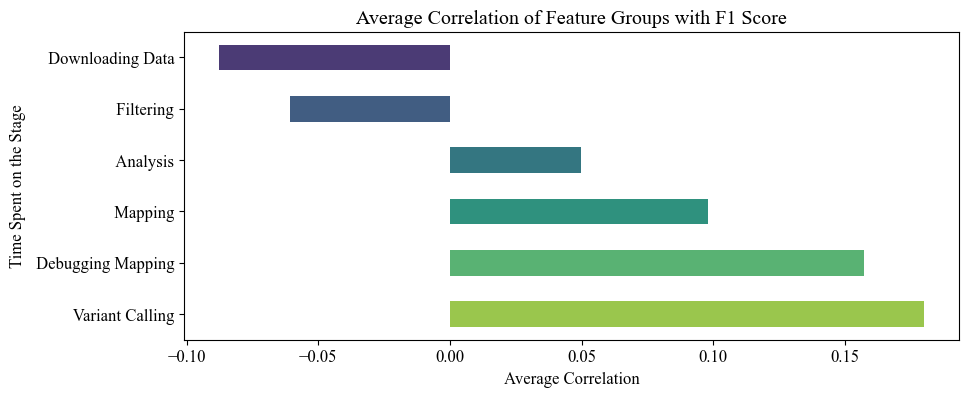

In [73]:
plt.rcParams.update({'font.size': 12})

# Merge the encoded features back with the original data to keep F1
data_with_encoded = data.join(data_encoded)

# Calculate correlations with F1 score
correlations = data_with_encoded.corr()["f1"].sort_values()

# Extract correlations for important features
#important_feature_correlations = {feature: correlations[[col for col in data_encoded.columns if col.startswith(feature)]].mean() for feature in important_features}
important_feature_correlations = {feature: correlations[[col for col in data_encoded.columns if col.startswith(feature)]].mean() for feature in feature_groups}

# Convert to Series for easier plotting
important_feature_correlations = pd.Series(important_feature_correlations).sort_values()

# drop Caller, MApper, BAseCalib
important_feature_correlations = important_feature_correlations.drop(["Caller", "Mapper", "BaseCalib", "Time_for_visualization", "Time_for_report", "Time_for_presentation"])

feat_list = []
for feat in important_feature_correlations.index.tolist():
    feat_list.append(feat.replace("_", " ").replace(" spent on", " for").replace("Time for", "").replace("Time", "").title())


# Plot the correlations
fig2 = plt.figure(figsize=(10, 4))
sns.barplot(x=important_feature_correlations, y=feat_list, width=0.5, palette="viridis")
plt.title("Average Correlation of Feature Groups with F1 Score")
plt.xlabel("Average Correlation")
plt.ylabel("Time Spent on the Stage")
plt.savefig(os.path.join(DIRECTORY, "Figures", "average_correlation_feature_groups.pdf"))
plt.show()

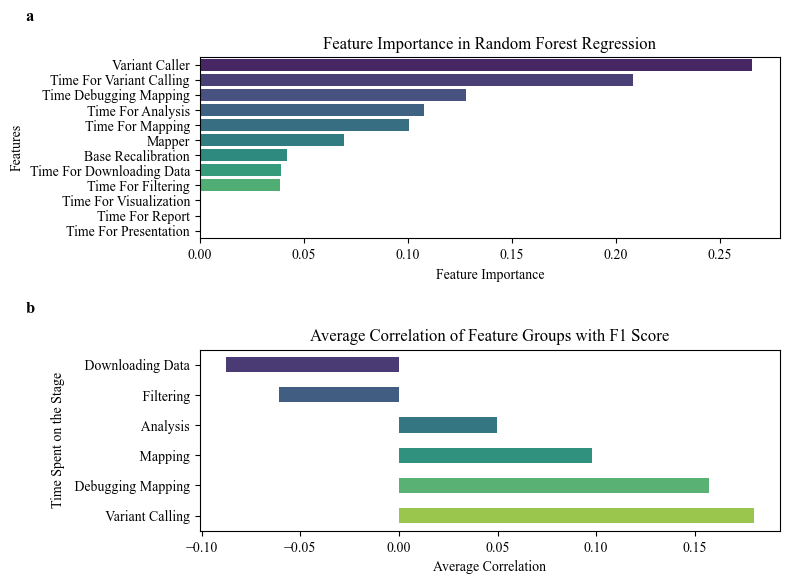

In [74]:
# Merge fig1 and fig2 vertically

plt.rcParams.update({'font.size': 10, 'font.family': 'times new roman'})
fig, axs = plt.subplots(2, 1, figsize=(8, 6))
sns.barplot(x=aggregated_importances, y=feature_names, palette="viridis", ax=axs[0])

sns.barplot(x=important_feature_correlations, y=feat_list, width=0.5, palette="viridis", ax=axs[1])

axs[0].set_title("Feature Importance in Random Forest Regression")
axs[0].set_xlabel("Feature Importance")
axs[0].set_ylabel("Features")

axs[1].set_title("Average Correlation of Feature Groups with F1 Score")
axs[1].set_xlabel("Average Correlation")
axs[1].set_ylabel("Time Spent on the Stage")

axs[0].text(-0.3, 1.2, "a", transform=axs[0].transAxes, fontsize=12, fontweight='bold')
axs[1].text(-0.3, 1.2, "b", transform=axs[1].transAxes, fontsize=12, fontweight='bold')

plt.tight_layout()
plt.savefig(os.path.join(DIRECTORY, "Figures", "feature_importance_correlation.pdf"))
plt.show()
